In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chisquare

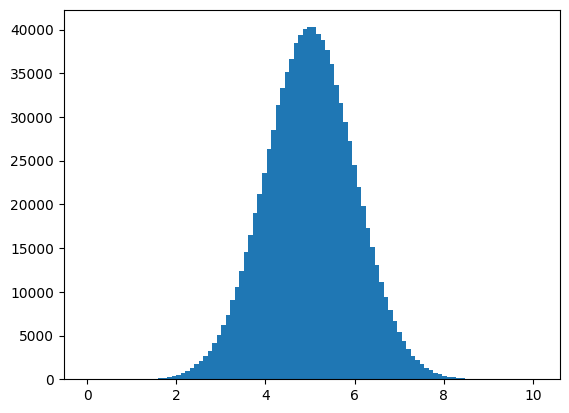

In [86]:
xHisto = np.random.normal(loc=5, scale=1, size=1000000)
n, bins, _ = plt.hist(xHisto, bins=100)


In [87]:
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2/(2 * sigma**2))

In [88]:
binCenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins) - 1)])

In [105]:
popt, pcov = curve_fit(gauss, xdata=binCenters, ydata=n, p0=[1, 1, 1])

array([4.03677822e+04, 5.00054469e+00, 1.00000100e+00])

`popt` are the best parameters for the fit function. `pcov` is a 2D matrix of the covariance of the parameters. This means that the diagonal is the variance of the parameters!

<BarContainer object of 100 artists>

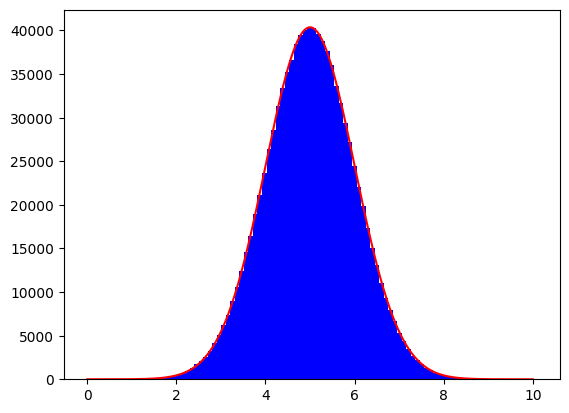

In [114]:
xFun = np.linspace(0, 10, 10000)
plt.plot(xFun, gauss(xFun, *popt), color='red')
plt.bar(x=binCenters, height=n, width=bins[1]-bins[0], color='blue')

`np.sum(n)/np.sum(y)*y` is used to normalise y. Otherwise, sum(n) != sum(y) and chi square couldn't be calculated.

`ddof = 3` because 3 parameters have been estimated from data.

In [130]:
y = gauss(binCenters, *popt)
chisquare(f_obs=n, f_exp=np.sum(n)/np.sum(y)*y, ddof=3)

Power_divergenceResult(statistic=102.5873040978383, pvalue=0.3040430786639897)